### vUnivariate and Multivariate Time Series:


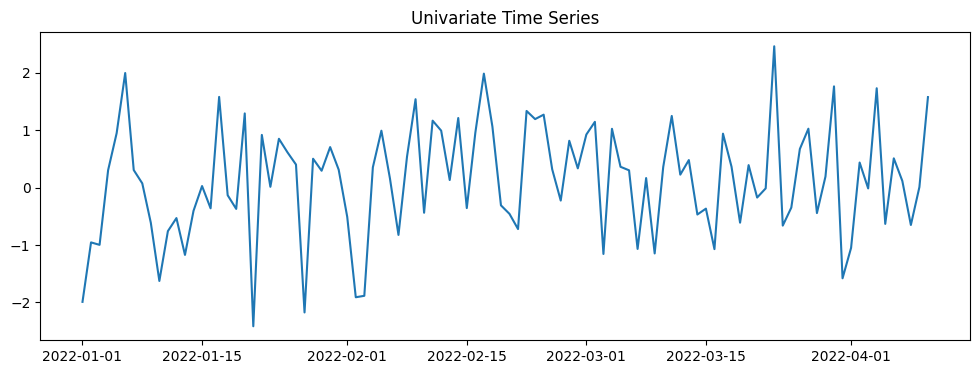

<Figure size 1200x600 with 0 Axes>

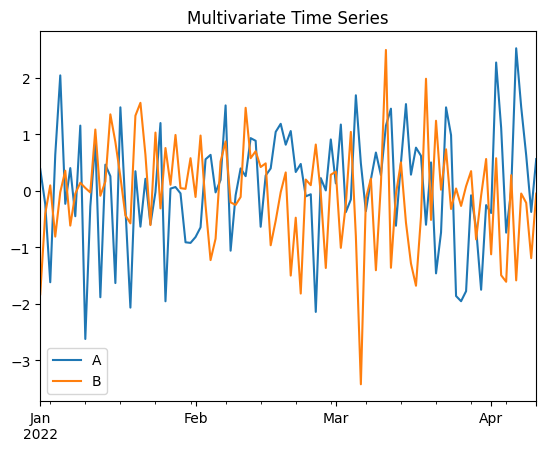

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Univariate Time Series
univariate_data = pd.Series(np.random.randn(100), index=pd.date_range('2022-01-01', periods=100))

# Multivariate Time Series
multivariate_data = pd.DataFrame({'A': np.random.randn(100), 'B': np.random.randn(100)},
                                 index=pd.date_range('2022-01-01', periods=100))

# Plotting Univariate Time Series
plt.figure(figsize=(12, 4))
plt.plot(univariate_data)
plt.title('Univariate Time Series')
plt.show()

# Plotting Multivariate Time Series
plt.figure(figsize=(12, 6))
multivariate_data.plot()
plt.title('Multivariate Time Series')
plt.show()


### Application in Technology:

Mean Squared Error: 30.309155592781305


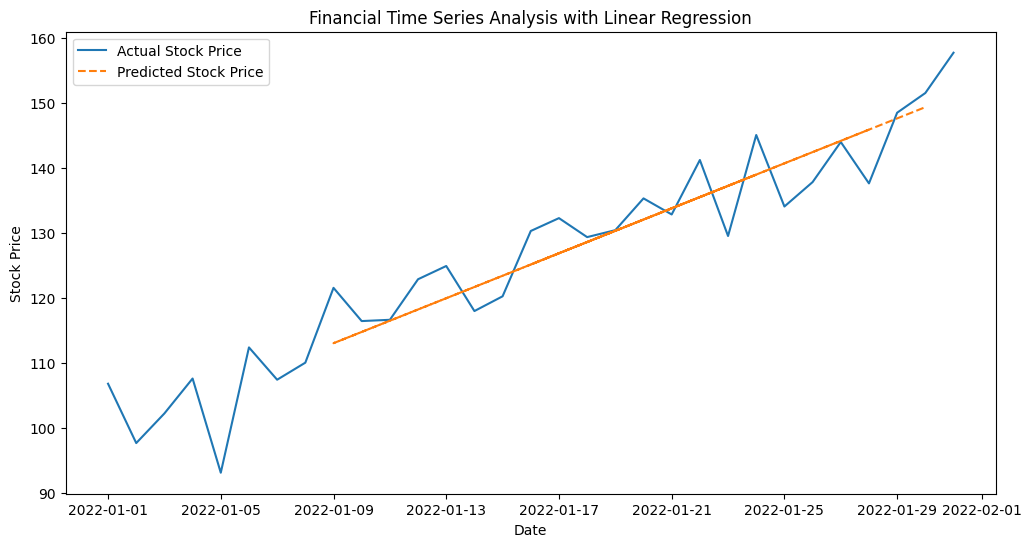

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate Financial Time Series Data
date_rng = pd.date_range(start='2022-01-01', end='2022-01-31', freq='D')
financial_data = pd.DataFrame({'Date': date_rng, 'Stock_Price': np.linspace(100, 150, num=len(date_rng)) + np.random.normal(0, 5, len(date_rng))})

# Train Linear Regression Model
X = financial_data.index.values.reshape(-1, 1)
y = financial_data['Stock_Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
predictions = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting Financial Time Series and Predictions
plt.figure(figsize=(12, 6))
plt.plot(financial_data['Date'], financial_data['Stock_Price'], label='Actual Stock Price')
plt.plot(financial_data['Date'].iloc[X_test.flatten()], predictions, label='Predicted Stock Price', linestyle='--')
plt.title('Financial Time Series Analysis with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### Linguistic Data as Time Series

1/1 [==============================] - 1s 969ms/step


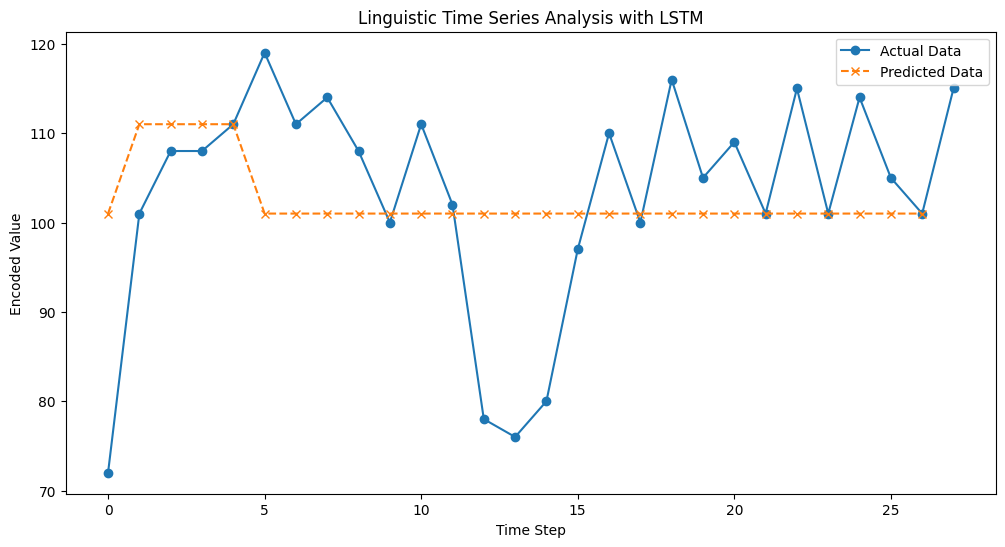

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Generate Linguistic Time Series Data
text_data = ["Hello", "world", "of", "NLP", "and", "time", "series"]
encoded_data = [ord(char) for word in text_data for char in word]

# Reshape Data for LSTM
X = np.array(encoded_data[:-1]).reshape(1, len(encoded_data)-1, 1)
y = np.array(encoded_data[1:]).reshape(1, len(encoded_data)-1, 1)

# Build LSTM Model
model = Sequential([
    Embedding(input_dim=128, output_dim=8, input_length=len(encoded_data)-1),
    LSTM(32, return_sequences=True),
    Dense(128, activation='softmax')
])

# Compile and Fit Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X, y, epochs=100, verbose=0)

# Generate Predictions
predicted_sequence = model.predict(X)

# Plotting Linguistic Time Series and Predictions
plt.figure(figsize=(12, 6))
plt.plot(encoded_data, label='Actual Data', marker='o')
plt.plot(np.argmax(predicted_sequence, axis=-1).flatten(), label='Predicted Data', linestyle='--', marker='x')
plt.title('Linguistic Time Series Analysis with LSTM')
plt.xlabel('Time Step')
plt.ylabel('Encoded Value')
plt.legend()
plt.show()
